### Chapter 2.4.2.6 
# Mixture Distribution

---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

A mixture distribution $A$ is derived from a collection of $k$ other independent random variables $A_1,\dotsc,A_k$. With probability $p_i$, the random variable $A_i$ is chosen, for $i=1,\dotsc,k$. Then, the value of the selected random variable $A_i$ is realized.  Thus, the random variable $A$ follows $A_i$ with probability $p_i$. We obtain the following relations.

$
a(t) = \sum_{i=1}^k p_i \cdot a_i(t) \;, \qquad A(t) = \sum_{i=1}^k p_i \cdot A_i(t) \\
E[A] = \sum_{i=1}^k p_i \cdot E[A_i] \;, \quad E[A^n] = \sum_{i=1}^k p_i \cdot E[A_i^n]\\
\Phi_{A}(s) = \int\limits_{0}^\infty e^{-st} a(t) \;dt 
= \int\limits_{0}^\infty e^{-st} \sum_{i=1}^k p_i \cdot a_i(t) \;dt  = \sum_{i=1}^k p_i \cdot \Phi_{A_i}(s)
$

### Example: Mix of Exponential and Deterministic Distribution
With probability $p=1/2$, the distribution $A$ follows an exponential distribution $X \sim \mathrm{EXP}(\lambda)$ with $\lambda=1$. With probability $p=1/2$, the distribution $A$ follows a deterministic distribution $Y \sim \mathrm{D}(t_0)$ with $t_0=1$. Please note that the sum $Z_0=X+Y$ follows a shifted exponential distribution with PDF $z_0(t) = e^{-(t-0.5)}$ for $t \geq t_0$ and $z_0(t)=0$ for any other $t$. Hence, the weighted sum of distributions ($Z=\frac{1}{2}X+\frac{1}{2}Y$) differs from the mixture distribution $A=\mathrm{MIX}((X,Y),(\frac{1}{2},\frac{1}{2}))$.

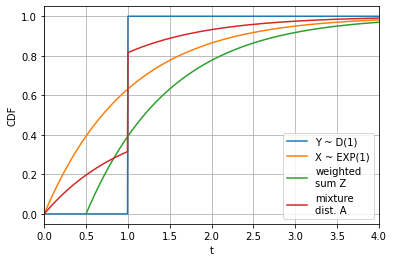

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# CDF of a deterministic distribution
def deltaCDF(t, t0=1):
    y = np.zeros_like(t)
    y[t>=t0] = 1
    return y

# CDF of the mixture distribution between exponential CDF and deterministic CDF
def mix(t, lam=1, t0=1, p=1/2):
    return p*(1-np.exp(-lam*t))+(1-p)*deltaCDF(t,t0)


t = np.linspace(0,10,2000)

plt.plot(t, deltaCDF(t), label='Y ~ D(1)')
plt.plot(t, 1-np.exp(-t), label='X ~ EXP(1)')
plt.plot(t+1/2,1-np.exp(-t), label='weighted\nsum Z')
plt.plot(t, mix(t), label='mixture\ndist. A')
plt.ylabel('CDF')
plt.xlabel('t')
plt.xlim([0, 4])
plt.legend()
plt.grid(which='major');
